# Lending Club Case Study

## Initializing all imports of libraries needed

#### Assumption : Analysing to get the prediction for new loan applicants

In [1]:
#importing all required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

## Data Sourcing and Initial observations

##### importing the csv file and assigning it to variable data. 
##### Got an error initially and added the paramater 'low_memory = False' to fix the issue. The error message got without the flag is related to the pandas. It indicates that there is a warning about mixed data types in column 47 of the CSV file that was being read.
##### Setting low_memory=False disables the memory optimization when reading the file, which can help resolve the warning.


In [2]:
data = pd.read_csv("loan.csv", low_memory=False)

In [3]:
#check the shape of the data
data.shape

(39717, 111)

In [4]:
#preview the data in the csv
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Fixing Rows and Columns

##### On observing the data from the csv , it is clear that there are 39717 rows of data with 111 columns in the file. For the purpose of this assignment , we might not need all data present and hence some columns can be discarded . We will attempt to identify irrelavent data for this assignment in the following steps


#### upon first glance in the csv file following obeservations were made
Does not serve the analysis
- id,memberid,emp_title,zip_code are irrelevant
- url has the same url for all loans with loan id
- desc - description 
- policy code

Columns with unique values tha don't serve the purpose
- pymnt_plan looks like it only has value 'n'
- initial_list_status looks like it only has value 'f'
- application_type looks like it only has value 'INDIVIDUAL'
- acc_now_delinq looks like it only has 0 value
- chargeoff_within_12_mths looks like it only has 0 value
- delinq_amnt looks like it only has 0 value
- tax_liens looks like all values are 0

In [5]:
irrelevant =['id','member_id','emp_title','title','url','desc','policy_code','zip_code']
unique_values = ['application_type','pymnt_plan','initial_list_status','acc_now_delinq','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']

In [6]:
#check if assumptions are true
pymnt_plan = data['pymnt_plan'].unique()
initial_list_status = data['initial_list_status'].unique()
application_type = data['application_type'].unique()
acc_now_delinq = data['acc_now_delinq'].unique()
chargeoff_within_12_mths = data['chargeoff_within_12_mths'].unique()
collections_12_mths_ex_med = data['collections_12_mths_ex_med'].unique()
delinq_amnt = data['delinq_amnt'].unique()
tax_liens = data['tax_liens'].unique()
print('pymnt_plan values = ',pymnt_plan)
print('initial_list_status values = ',initial_list_status)
print('application_type values = ',application_type)
print('acc_now_delinq values = ',acc_now_delinq)
print('chargeoff_within_12_mths values = ',chargeoff_within_12_mths)
print('delinq_amnt values = ',delinq_amnt)
print('tax_liens values = ',tax_liens)

pymnt_plan values =  ['n']
initial_list_status values =  ['f']
application_type values =  ['INDIVIDUAL']
acc_now_delinq values =  [0]
chargeoff_within_12_mths values =  [ 0. nan]
delinq_amnt values =  [0]
tax_liens values =  [ 0. nan]


In [7]:
data = data.drop(irrelevant,axis=1)
data = data.drop(unique_values,axis=1)

In [8]:
data.shape

(39717, 96)

## Missing Values Data Clean Up Process 
### Clearing columns with missing values in all rows

In [9]:
# Cleaning up cloumns with all NaN values,as they will not contribute to our analysis
# first lets check if such columns exist from out initial hypothesis by getting sum of all null rows for every column
data.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
                              ...  
pub_rec_bankruptcies            697
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 96, dtype: int64

In [10]:
# As seen ablove we have lot of columns with NaN values, hence removing them with following command
data = data.dropna(axis=1,how="all")

In [11]:
data.shape

(39717, 42)

In [12]:
data.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record        36931
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
out_prncp                   

In [13]:
#couple of columns have more than 90% NaN values hence removing them 
data = data.drop(['mths_since_last_record','next_pymnt_d'],axis=1)

In [14]:
data.shape

(39717, 40)

#### We have now reduced the number of columns to Analyse from 111 to 40. 

### Filtering Data

#### There are columns that does not help in analysis of defaulters according to our assumption. 

The following columns are relevant when the loan is already provided to the customers thus they can't be used to predict if a new applicant is going to be a defaulter. Hence removing them

In [15]:
irrelevant_to_new_applicants = ['collection_recovery_fee','delinq_2yrs','earliest_cr_line','last_pymnt_amnt',
                                'last_pymnt_d','mths_since_last_delinq','out_prncp','out_prncp_inv',
                               'recoveries','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee',
                                'total_rec_prncp','collections_12_mths_ex_med','last_credit_pull_d',
                                'pub_rec_bankruptcies','funded_amnt_inv','revol_bal']

In [16]:
data = data.drop(irrelevant_to_new_applicants,axis=1)

In [17]:
data.shape

(39717, 21)

### Standardizing Values



In [18]:
data.dtypes

loan_amnt                int64
funded_amnt              int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
dtype: object

#### Identified Loan status as Target Column
Removing rows with loan status as Current, as we can't analyse for deafulter with them


In [19]:
data= data[data.loan_status != "Current"]

In [20]:
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

#### Convert the columns to appropriate data types and deriving the columns wherever required


In [21]:
#convert term column to continuous data
data.term = data.term.str.rstrip(" months")

In [22]:
data.term = data.term.astype("int32")

In [23]:
data.term.dtype

dtype('int32')

In [24]:
#interest rate column to continuous data
data.int_rate = data.int_rate.str.rstrip("%")

In [25]:
data.int_rate = data.int_rate.astype("float64")

In [26]:
data.int_rate.dtype

dtype('float64')

In [27]:
#now let's extract year and month from date column
data.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [28]:
data['date'] = pd.to_datetime(data.issue_d, format="%b-%y")

In [29]:
data['date'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: date, dtype: datetime64[ns]

In [30]:
data['year'] = pd.DatetimeIndex(data['date']).year

In [31]:
data.year.value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: year, dtype: int64

In [32]:
data['month'] = pd.DatetimeIndex(data['date']).month

In [33]:
data['month'].value_counts()

12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: month, dtype: int64

In [34]:
#cleaning employment length column
data.emp_length.isnull().sum()

1033

In [35]:
data.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [36]:
data.emp_length.mode()[0]

'10+ years'

In [37]:
#filling up na with mode value 
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)
data.emp_length.isna().sum()

0

In [38]:
data.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [39]:
data['emp_length'] = data['emp_length'].str.replace('< 1 year','0').str.replace('+','').str.replace(' years','').str.replace(' year','')

In [40]:
data.emp_length.value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [41]:
#cleaning up revol_util column
data['revol_util'].value_counts()
data.revol_util.isnull().sum()

50

In [42]:
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
data.revol_util.isna().sum()

0

In [43]:
data['revol_util'] = data['revol_util'].str.replace('%', '').astype(float)

In [44]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'date', 'year', 'month'],
      dtype='object')

### Standardizing by removing Outliers

Text(0.5, 1.0, 'Funded Amount')

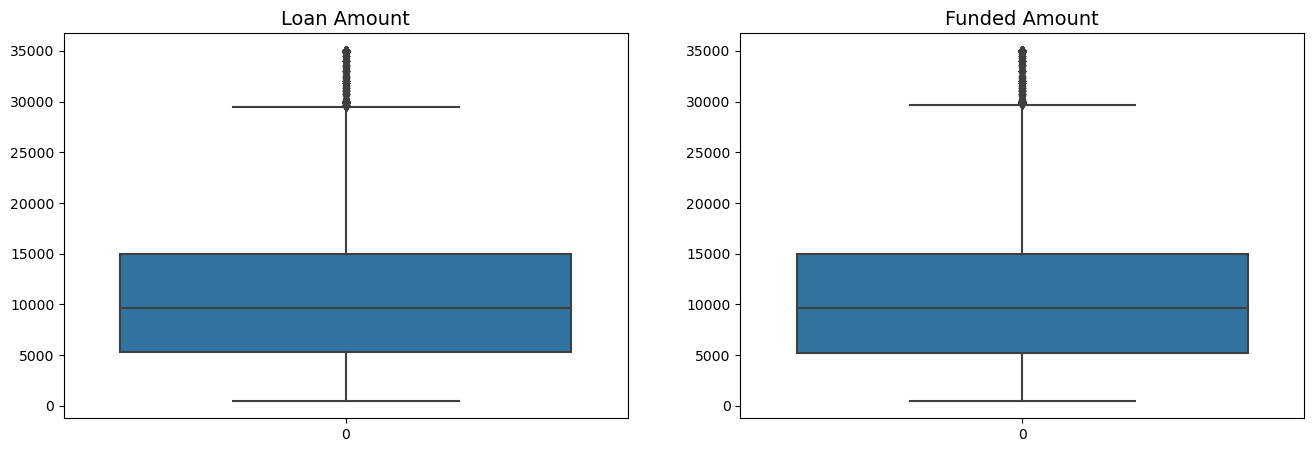

In [45]:
#Outliers cleanup  for loan amount and funded amount
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.boxplot(data["loan_amnt"].values , ax = ax[0])
ax[0].set_title("Loan Amount", fontsize=14)
sns.boxplot(data["funded_amnt"].values, ax=ax[1])
ax[1].set_title("Funded Amount", fontsize=14)

##### Onbservation: Checking outliers for loan aount and funded amount. Since we can see a distribution, we decided to not remove any values

##### Outliers cleanup for annual income


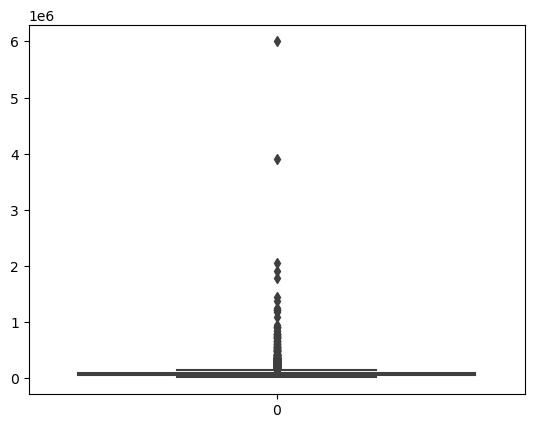

In [46]:
sns.boxplot(data.annual_inc)
plt.show()

In [47]:
#removing the outliers
data1= data[data.annual_inc < 3000000]

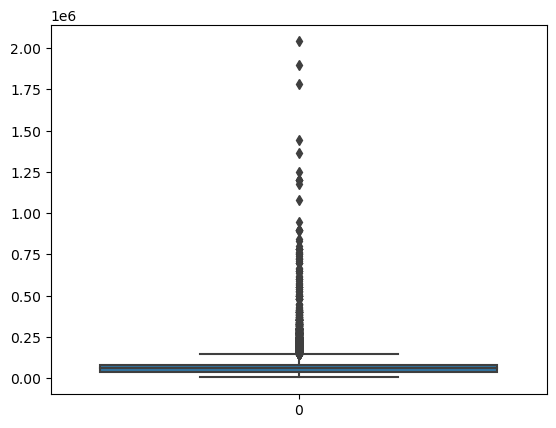

In [48]:
sns.boxplot(data1.annual_inc)
plt.show()

In [49]:
data1= data1[data1.annual_inc < 1500000]

In [50]:
data1[data1.annual_inc > 1000000].shape

(9, 24)

In [51]:
data1= data1[data1.annual_inc < 1000000]

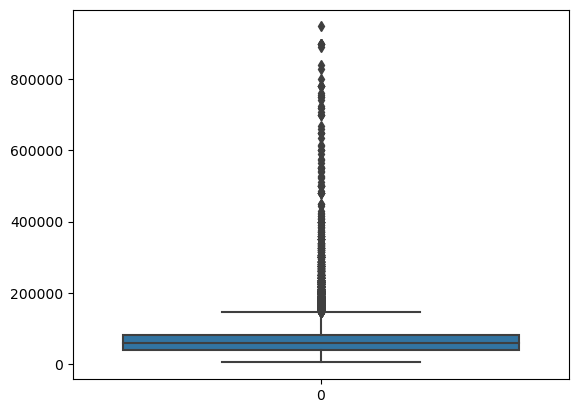

In [52]:
sns.boxplot(data1.annual_inc)
plt.show()

#### Categorizing columns into different bins into new data set

In [53]:
#Annual Income 
# check the min and max values in annual_inc

max_value = data1['annual_inc'].max()
min_value = data1['annual_inc'].min()

print(max_value, min_value)

948000.0 4000.0


In [75]:
#function to categorize loan amout 
def categorize_annual_amnt(value):
    if value<30000 :
        return "0-30k"
    elif value >=30000 and value < 60000:
        return  "30k-60k"
    elif value >= 60000 and value < 90000:
        return "60k-90k"
    elif value >= 90000 and value < 150000:
        return "90k-150k"
    elif value >= 150000 and value < 300000:
        return "150k-300k"
    elif value >= 300000 and value < 600000:
        return "300k-600k"
    elif value >= 600000:
        return "600k-948k"

In [76]:
#creating new column with function
data1['annual_income_category'] = data1['annual_inc'].apply(lambda x:categorize_annual_amnt(x))

In [77]:
data1['annual_income_category'].value_counts()

30k-60k      15729
60k-90k      11046
90k-150k      6322
0-30k         3722
150k-300k     1491
300k-600k      166
600k-948k       51
Name: annual_income_category, dtype: int64

In [57]:
#categorizing interest rate column
max_value = data1['int_rate'].max()
min_value = data1['int_rate'].min()

print(max_value, min_value)

#function to categorize interest rate 
def categorize_interest_rate(value):
    if value<5 :
        return "0-5%"
    elif value >=5 and value < 10:
        return  "5-10%"
    elif value >= 10 and value < 15:
        return "10-15%"
    elif value >= 15 and value < 20:
        return "15-20%"
    elif value >= 20 and value < 25:
        return "20-25%"
    elif value >= 25:
        return ">25%"

24.4 5.42


In [89]:
data1['int_rate_category'] = data1['int_rate'].apply(lambda x:categorize_interest_rate(x))

data1['int_rate_category'].value_counts()

10-15%    18494
5-10%     12067
15-20%     7199
20-25%      767
Name: int_rate_category, dtype: int64

In [59]:
#categorizing loan amount

max_value = data1['loan_amnt'].max()
min_value = data1['loan_amnt'].min()

print(max_value, min_value)

#function to categorize loan amount
def categorize_loan_amount(value):
    if value >= 500 and value < 3000:
        return "500-3k"
    elif value>=3000 and value < 6000:
        return "3k-6k"
    elif value >= 6000 and value < 9000:
        return "6k-9k"
    elif value >= 9000 and value < 12000:
        return "9k-12k"
    elif value >= 12000 and value < 15000:
        return "12k-15k"
    elif value >= 15000 and value < 20000:
        return "15k-20k"
    elif value >= 20000 and value < 30000:
        return "20k-30k"
    elif value >= 30000:
        return "30k +"

35000 500


In [70]:
data1['loan_amount_category'] = data1['loan_amnt'].apply(lambda x:categorize_loan_amount(x))
data1.loan_amount_category.value_counts()

3k-6k      7578
6k-9k      7523
9k-12k     5563
20k-30k    4734
15k-20k    4650
12k-15k    4608
500-3k     2799
30k +      1072
Name: loan_amount_category, dtype: int64

In [61]:
#categorizing installments

min = data.installment.min()
max = data.installment.max()
print(min ,max)

#function to categorize loan amount
def categorize_installments(value):
    if value >= 15 and value < 100:
        return "12-100"
    elif value>=100 and value < 200:
        return "100-200"
    elif value >= 200 and value < 400:
        return "200-400"
    elif value >= 400 and value < 600:
        return "400-600"
    elif value >= 600 and value < 800:
        return "600-800"
    elif value >= 800 and value < 1000:
        return "800-1000"
    elif value >= 1000 and value < 1200:
        return "1000-1200"
    elif value >= 1200:
        return "1200+"
    


15.69 1305.19


In [144]:
data1['installment_category'] = data1['installment'].apply(lambda x:categorize_installments(x))
data1.installment_category.value_counts()

200-400      14722
100-200       9084
400-600       6560
12-100        3953
600-800       2637
800-1000      1336
1000-1200      176
1200+           59
Name: installment_category, dtype: int64

In [152]:
#categorizing open_acc
data1['open_acc_groups'] = pd.cut(data1['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])

In [146]:
#categorizing dti

data1['dti_groups'] = pd.cut(data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [108]:
#categorizing revol_util
data1['revol_util_groups'] = pd.cut(data1['revol_util'], bins=5,precision =0,labels=['0%-20%','20%-40%','40%-60%','60%-80','80%-100%'])
data1['revol_util_groups'].value_counts()

40%-60%     8402
60%-80      8012
0%-20%      7715
20%-40%     7715
80%-100%    6683
Name: revol_util_groups, dtype: int64

# Univariate Analysis of each columns with respect to Loan status

#### Comparing distribution of Loan amount and Funded amount to see if we can infer something from it

Text(0.5, 1.0, 'Funded Amount')

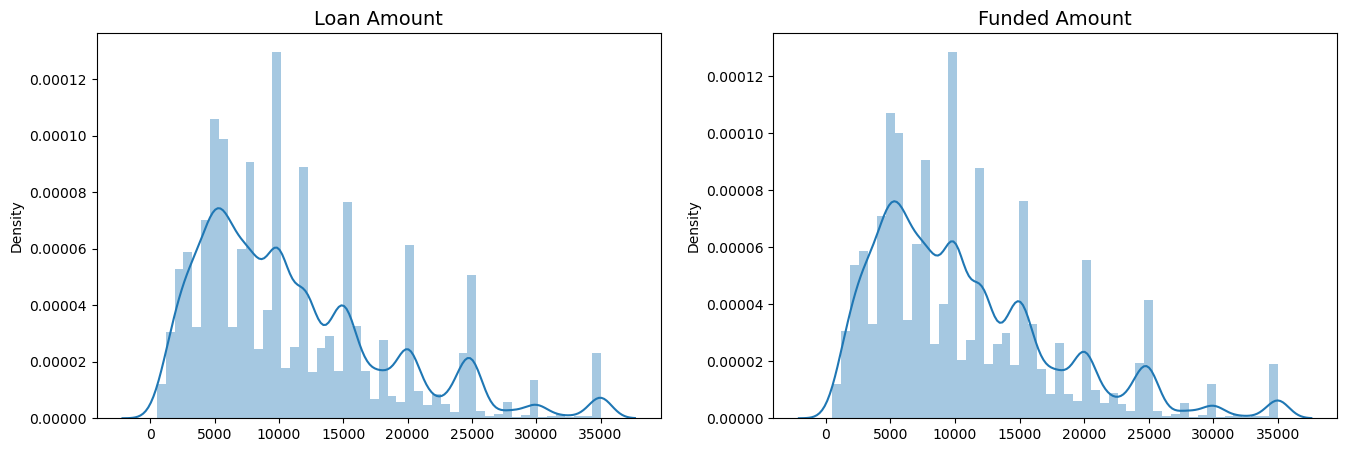

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.distplot(data["loan_amnt"].values , ax = ax[0])
ax[0].set_title("Loan Amount", fontsize=14)
sns.distplot(data["funded_amnt"].values, ax=ax[1])
ax[1].set_title("Funded Amount", fontsize=14)

### Analysing loan_status, year, month

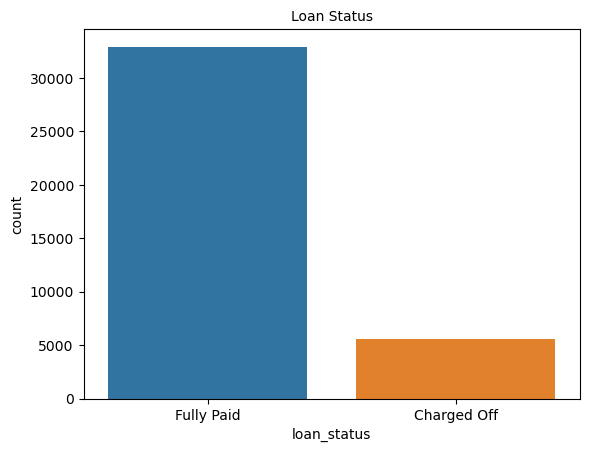

In [67]:
loan_status = data.loan_status

sns.countplot(x=loan_status,data=data)
plt.title("Loan Status", fontsize=10)
plt.show()

In [68]:
#Creating a data set for defaulters using charged off loan status
#Creating new data set for converting loan staus column to numeric


charged_off =data1[data1['loan_status']=='Charged Off']

data1 = data[data['loan_status']!='Current']
data1['loan_status'] = data1['loan_status'].apply(lambda x : 0 if x=='Fully Paid' else 1)
data1['loan_status'] = data1['loan_status'].apply(lambda x:pd.to_numeric(x))
data1['loan_status'].value_counts()

0    32916
1     5611
Name: loan_status, dtype: int64

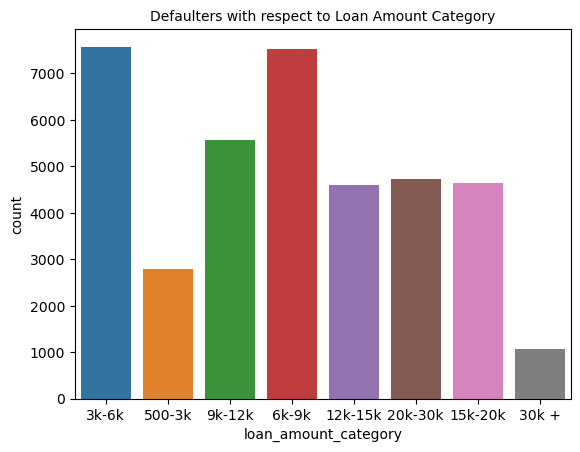

In [71]:
sns.countplot(x=data1.loan_amount_category,data=charged_off)
plt.title("Defaulters with respect to Loan Amount Category", fontsize=10)
plt.show()

#### Observation: Around 7000 Defaulters when loan amount is between 3k-9k

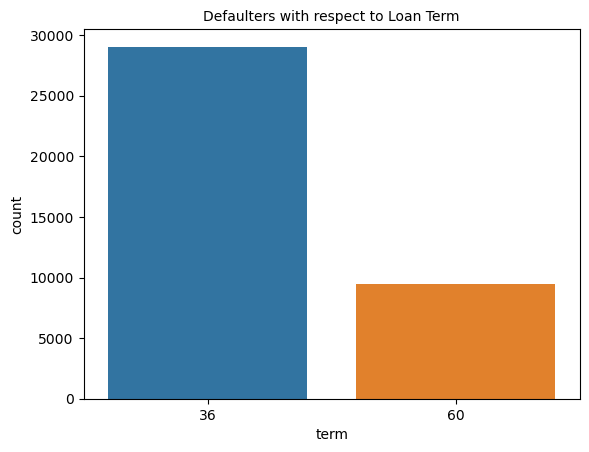

In [72]:
sns.countplot(x=data1.term,data=charged_off)
plt.title("Defaulters with respect to Loan Term", fontsize=10)
plt.show()

#### Observation: Overall we see that defaulters count for 36months term is almost three times to 60months term

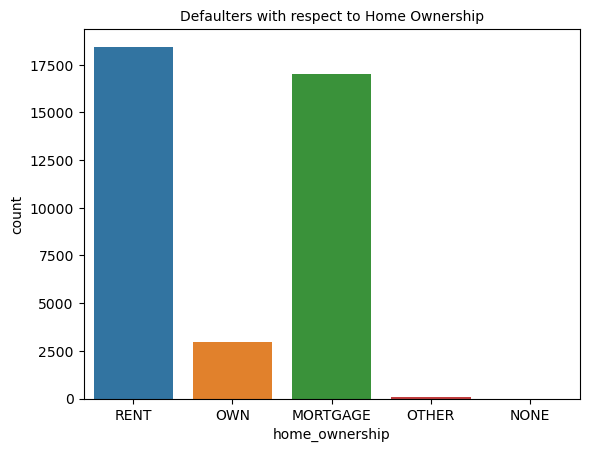

In [73]:
sns.countplot(x=data1.home_ownership,data=charged_off)
plt.title("Defaulters with respect to Home Ownership", fontsize=10)
plt.show()

#### Observation: Customers who have home ownership as Rent and Mortgage tend to default  more

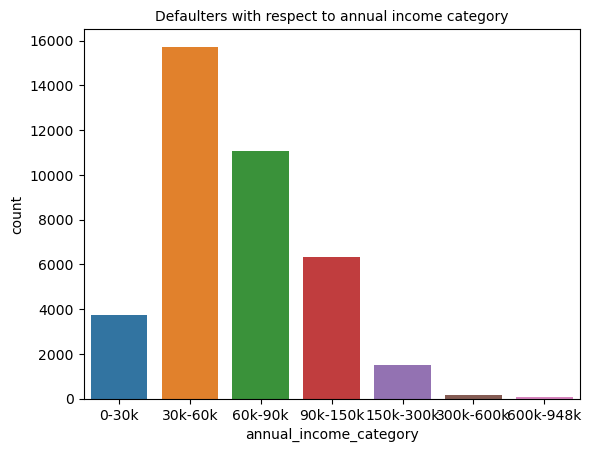

In [78]:
sns.countplot(x=data1.annual_income_category,data=charged_off)
plt.title("Defaulters with respect to annual income category", fontsize=10)
plt.show()

#### Observation : While looking at the loan status with only Annual income range of 30k to 60k tend to default on their loan more

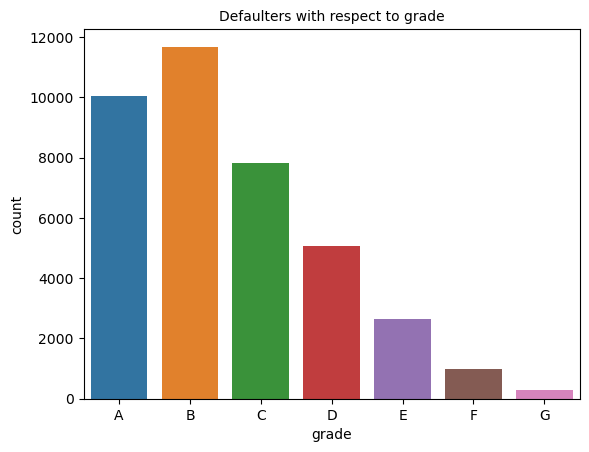

In [93]:
order = ['A','B','C','D','E','F','G']

sns.countplot(x=data1['grade'],data=charged_off,order=order)
plt.title("Defaulters with respect to grade", fontsize=10)
plt.show()

#### Observation/s : Loans with grade A,B,C seem to have high number of defaulters.

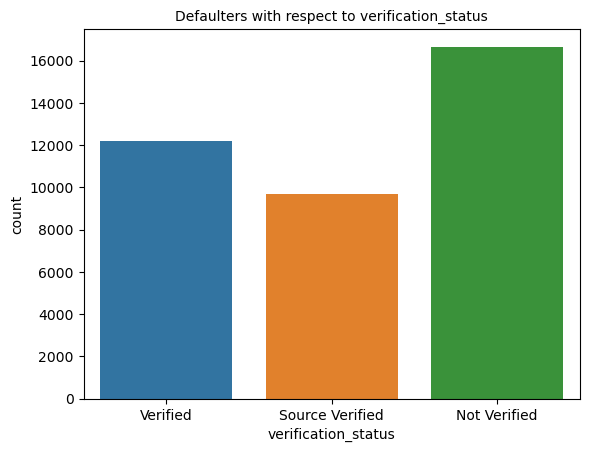

In [94]:
sns.countplot(x=data1.verification_status,data=data1.loan_status)
plt.title("Defaulters with respect to verification_status", fontsize=10)
plt.show()

#### Observation/s : Customers whose income was unverified seem to have high probability of defaulters.

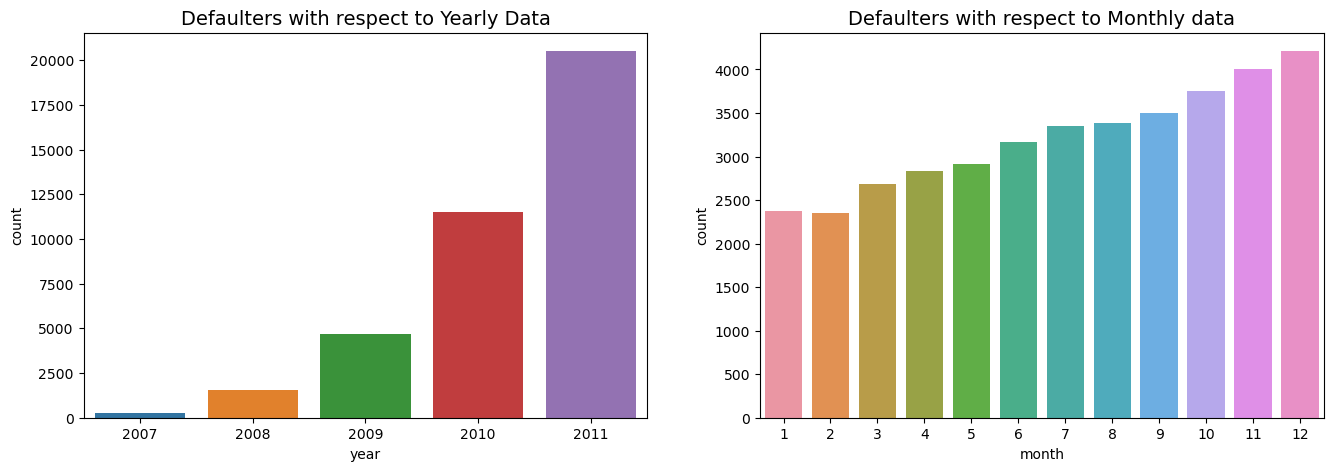

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.countplot(x=data.year,data=charged_off,ax = ax[0])
ax[0].set_title("Defaulters with respect to Yearly Data", fontsize=14)

sns.countplot(x=data.month,data=charged_off, ax = ax[1])
ax[1].set_title("Defaulters with respect to Monthly data", fontsize=14)

plt.show()

#### Obesrvation: Loans sanctioned in the year 2011 have highest number of defaulters. And the trend for months shows that loans sanctioned at backend of the year have relatively more defaulters, December being the highest

### Loan status across Interest rate category


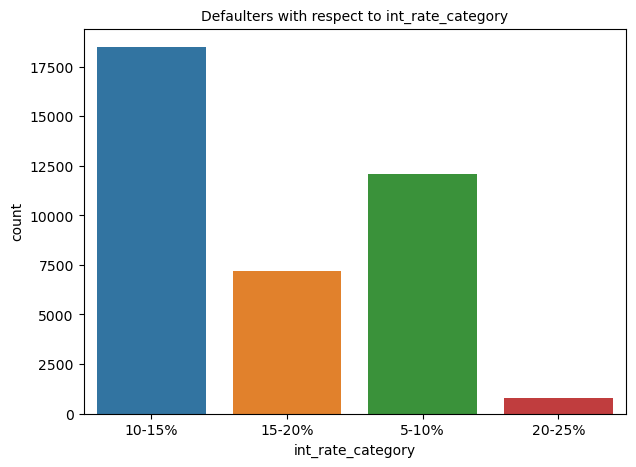

In [96]:
fig,ax = plt.subplots(figsize = (7,5))

sns.countplot(x=data1['int_rate_category'], data=charged_off)
plt.title("Defaulters with respect to int_rate_category", fontsize=10)
plt.show()

#### Observation : Interest rate category of 10-15% have high chance of defaulting

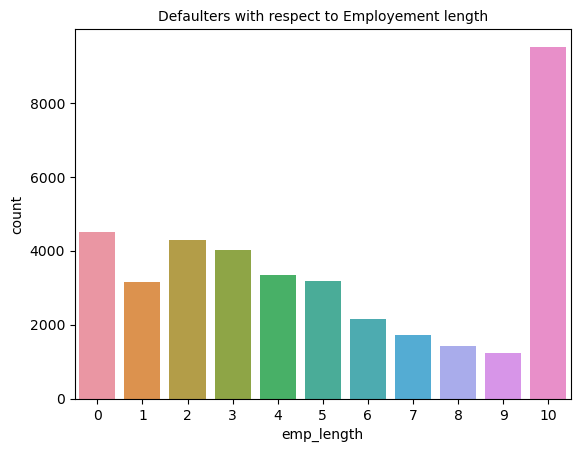

In [97]:
order = ['0','1','2','3','4','5','6','7','8','9','10']
sns.countplot(x=data1.emp_length,data=charged_off ,order=order)
plt.title("Defaulters with respect to Employement length", fontsize=10)
plt.show()

#### Observation : Customers with 10 years of experience tend to default more

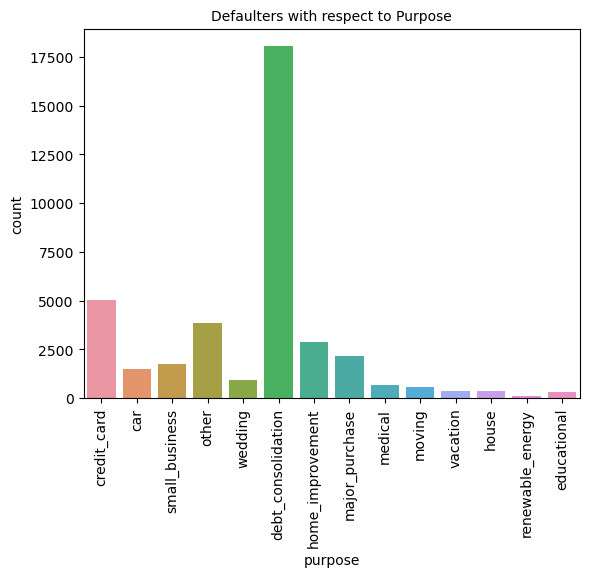

In [98]:
sns.countplot(x=data.purpose,data=charged_off)
plt.title("Defaulters with respect to Purpose", fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### Observation : Loans taken for Debt conslidation, have high number of defaulters

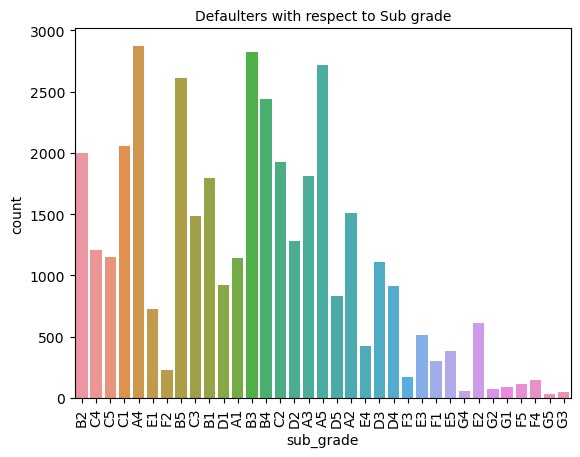

In [99]:
sns.countplot(x=data.sub_grade,data=charged_off)
plt.title("Defaulters with respect to Sub grade", fontsize=10)
plt.xticks(rotation=90)
plt.show()

### Address State for defaulters


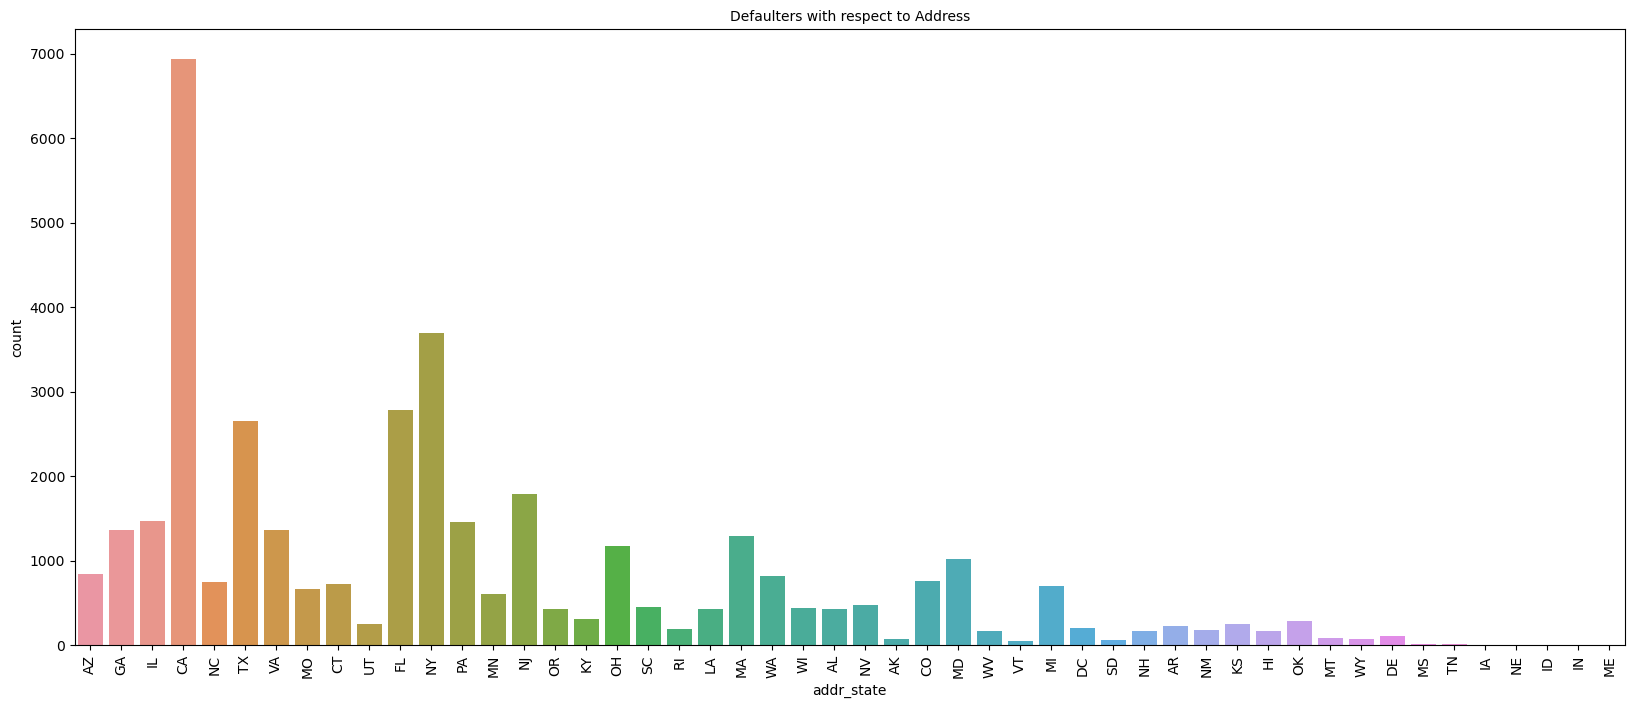

In [100]:

fig, ax = plt.subplots( figsize=(20,8))

charged_off =data[data['loan_status']=='Charged Off']

sns.countplot(x=data.addr_state, data=charged_off )
plt.title("Defaulters with respect to Address", fontsize=10)

plt.xticks(rotation=90)
plt.show()

#### Obseravtion: States of CA, FL and NY semm to have greater than 3000 defaulters

#### DTI : Your debt-to-income ratio (DTI) is all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

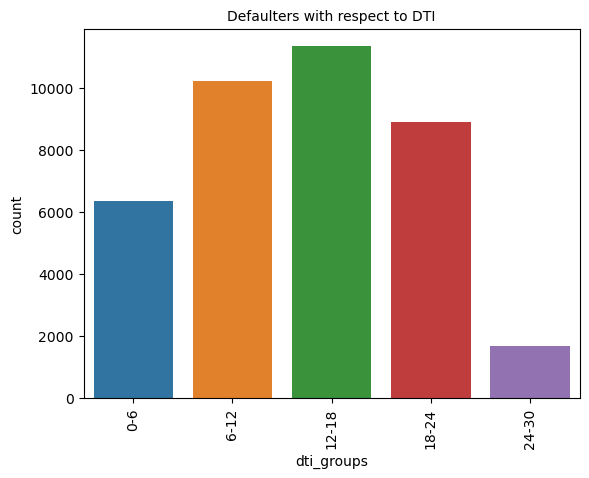

In [147]:
sns.countplot(x=data1.dti_groups,data=charged_off)
plt.title("Defaulters with respect to DTI", fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### Obseravtion: DTI range of 12-18 have high probability of defaulters

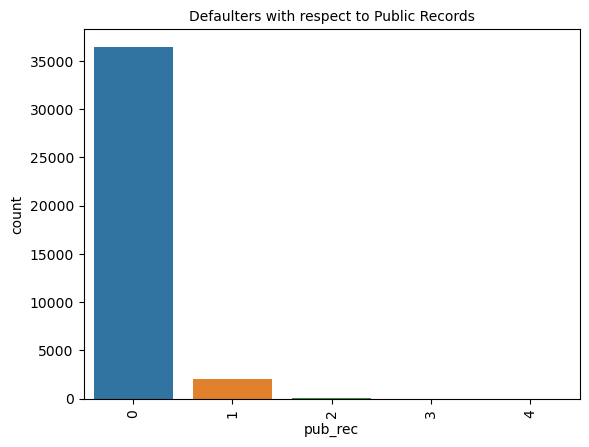

In [150]:
sns.countplot(x=data.pub_rec,data=charged_off)
plt.title("Defaulters with respect to Public Records", fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### Observation : We can see that banks issue a lot of loans to people with 0 public records, and this inturn shows that there is a high number of defaulters among them . Hence bank should consider additional factors over public record

### open_acc and revol_util and pub_rec
- Having too many open credit lines, makes one  look more risky to lenders. 
- Public record : Derogatory public records are those that contain negative information such as bankruptcies and liens.rds when giving loans to individuals

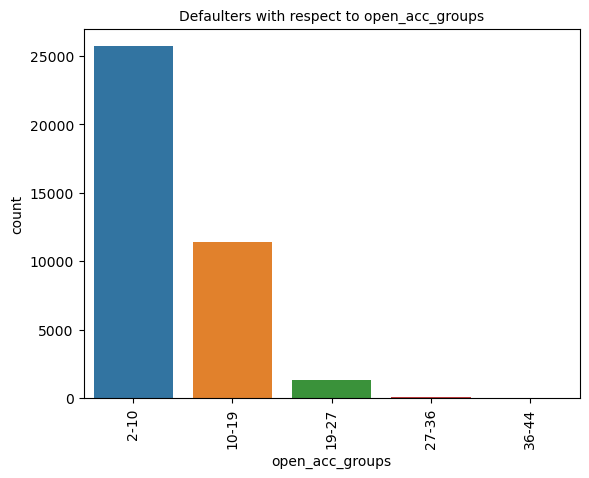

In [153]:
sns.countplot(x=data1.open_acc_groups,data=charged_off)
plt.title("Defaulters with respect to open_acc_groups", fontsize=10)
plt.xticks(rotation=90)
plt.show()

#### Observation : We can see that banks issue a lot of loans to people with 2-10 open credit line, and this inturn shows that there is a high number of defaulters among them . Hence bank should consider additional factors over open credit lines when giving loans to individuals

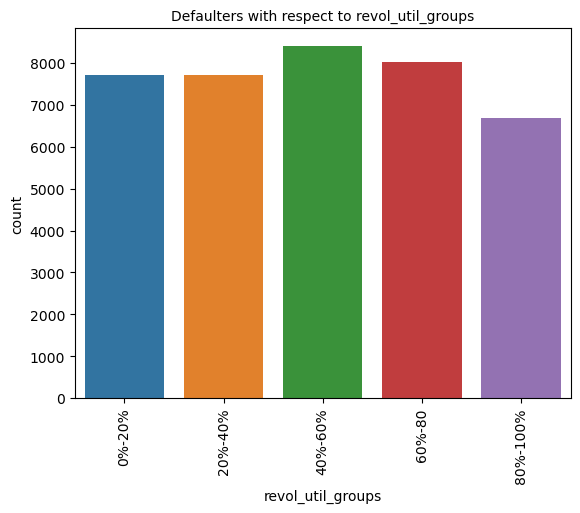

In [109]:
### Loan status with Revol_util
sns.countplot(x=data1.revol_util_groups,data=charged_off)
plt.title("Defaulters with respect to revol_util_groups", fontsize=10)
plt.xticks(rotation=90)
plt.show()


# Bivariate Analysis of columns with respect to Loan status

### Loan status and Loan amount

In [110]:
loan_status = data["loan_status"].values
loan_amount = data["loan_amnt"].values


Text(0.5, 1.0, 'Loan Status')

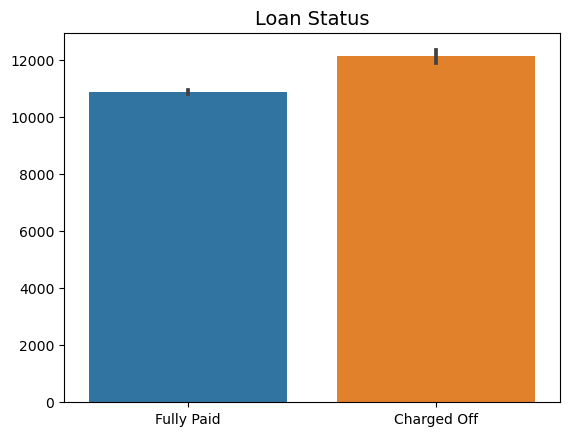

In [111]:
sns.barplot(x=loan_status,y=loan_amount)
plt.title("Loan Status", fontsize=14)

#### Loan status with Funded amount

Text(0.5, 1.0, 'Loan Status')

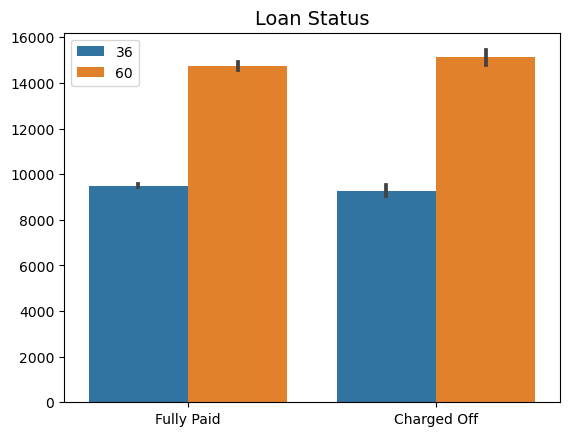

In [112]:
loan_status = data["loan_status"].values
funded_amount = data["funded_amnt"].values

term = data["term"].values
grade = data["grade"].values

sns.barplot(x=loan_status,y=funded_amount,hue=term)
plt.title("Loan Status", fontsize=14)

#### Observation: There is a high likelyhood that if the loan amount is high the probability of defaulting is high for term of 60 months

### Loan status ratio with Grade

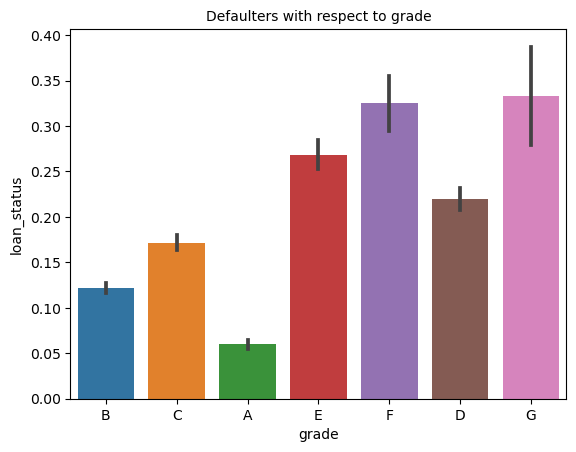

In [156]:

sns.barplot(x=data1['grade'],y=data1.loan_status, data=charged_off)
plt.title("Defaulters with respect to grade", fontsize=10)
plt.show()

#### Observation : Loans with grade E,F,G seem to have high probability of defaulters.

#### Loan amount v/s year and month of issue

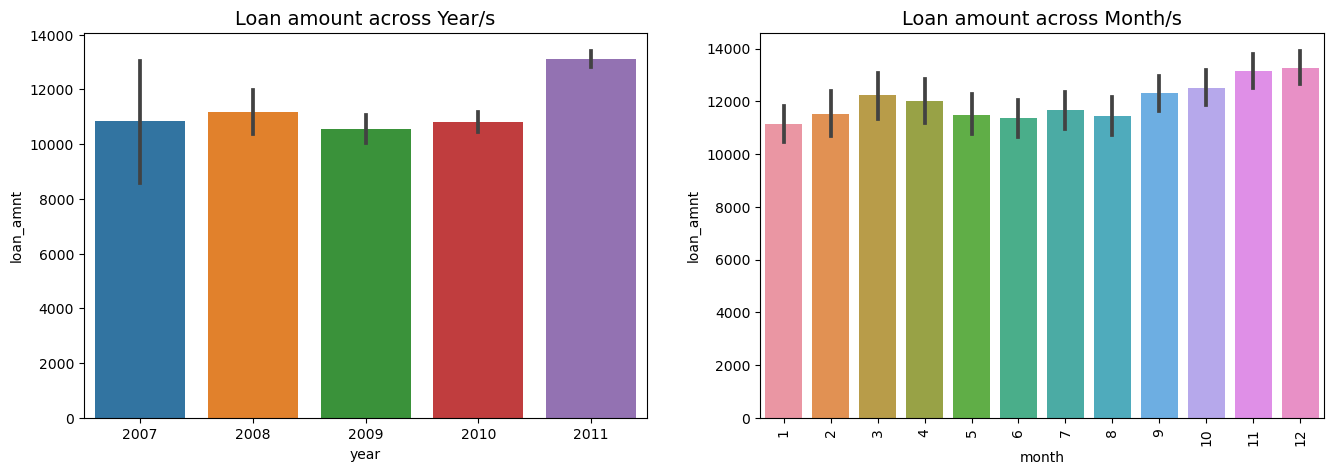

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.barplot(data =charged_off,x=charged_off.year, y=charged_off.loan_amnt,ax = ax[0])
plt.xticks(rotation=90)
ax[0].set_title("Loan amount across Year/s", fontsize=14)

sns.barplot(data =charged_off,x=charged_off.month, y=charged_off.loan_amnt, ax = ax[1])
plt.xticks(rotation=90)
ax[1].set_title("Loan amount across Month/s", fontsize=14)

plt.show()

#### Observation/s : Not too much to infer from amount of loan given across years and months but we see slightly more defaulter in 2011 and December

#### Loan status with respect to Employment Length and Loan amount


In [120]:
emp_comparision = data1.dropna(subset=['emp_length'])

emp_comparision.shape

(38527, 28)

In [121]:
emp_comparision['emp_length'] = emp_comparision['emp_length'].astype(int)

emp_comparision['emp_length'].dtype

dtype('int64')

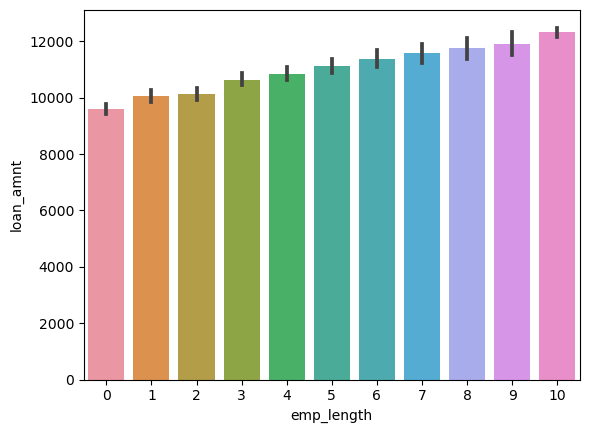

In [124]:
order = ['0','1','2','3','4','5','6','7','8','9','10']
sns.barplot(x= data1.emp_length, y=data1.loan_amnt, data=charged_off, order=order)
plt.show()

#### Observation/s : We see that people with higher experience are sanctioned higher loan amount and there is a higher probability of them not paying it back

## Loan status with Annual Income and Home ownership 

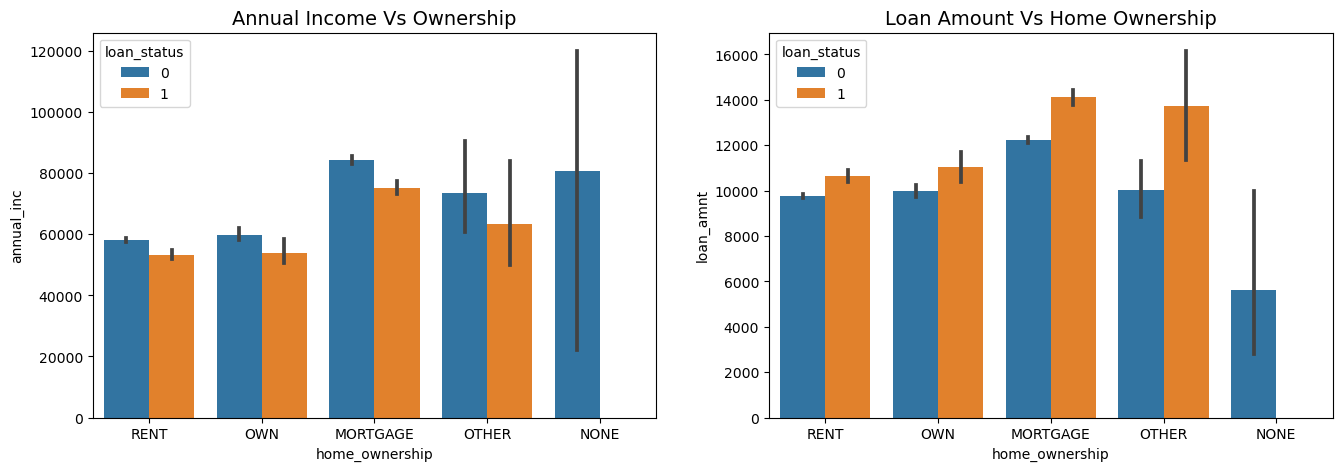

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.barplot(x=data.home_ownership, y=data.annual_inc, hue=data1.loan_status, ax = ax[0])
ax[0].set_title("Annual Income Vs Ownership", fontsize=14)

sns.barplot(x=data.home_ownership, y=data.loan_amnt, hue=data1.loan_status, ax = ax[1])
ax[1].set_title("Loan Amount Vs Home Ownership", fontsize=14)

plt.show()

Text(0.5, 1.0, 'Home ownership Vs Annual Income category')

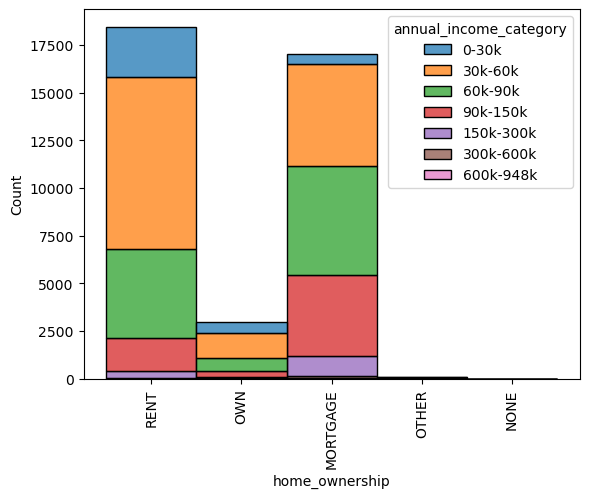

In [125]:
### Annual income category with Home ownership 

sns.histplot(data =data1,hue=data1.annual_income_category, x=data1.home_ownership, stat="count", multiple="stack" )
plt.xticks(rotation=90)
ax[0].set_title("Home ownership Vs Annual Income category", fontsize=14)

#### Observation : 
Graphs of Annual income and Home ownership shows : Customers with home ownership as mortgage are defaulting more even if thier annual income is high

Graphs of Loan amount and home ownership shows: Customers with home ownership as mortgage were given more loan, probably because thier annual income was high. But with these two graphs it is clear that there is a high likely hood for increased defaulters if they are paying Mortgage even if they have a higher annual income.


Graph of Home ownership Vs Annual Income category : Annual income category of customers with mortgage and rent have high number of defaulters is 30k-60k range.


#### Default Indicators  : Home ownership type as Mortgage and Rent with Annual income range of 30k-60k

## Loan status with Annual Income and Purpose

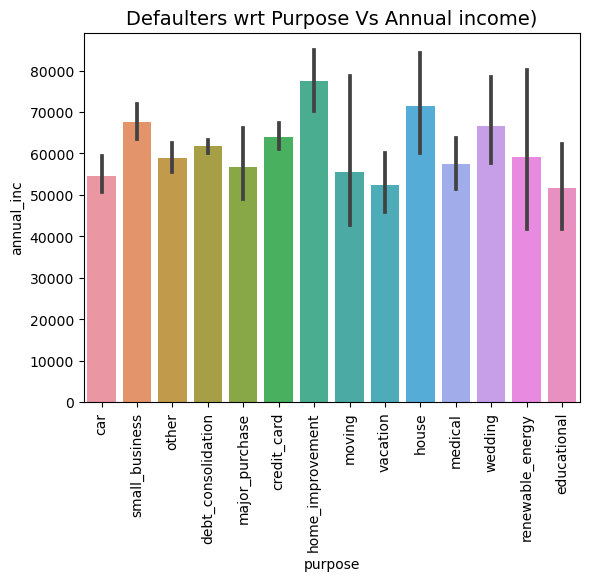

In [126]:
sns.barplot(data =data,x=charged_off.purpose, y=charged_off.annual_inc)
plt.xticks(rotation=90)
plt.title("Defaulters wrt Purpose Vs Annual income)", fontsize=14)
plt.show()

#### Observation : On first alalysis of purpose with loan status we saw that debt_consildation had higher default rate where as when compared along with annual income, people who tend to take loan for home_imporvement tend to default

#### Default Indicators : Customer with annual income close to 80k and provide loan purpose as home improvemnt 

### Loan status with Annual income and loan amount

Text(0.5, 1.0, 'Loan amount Vs Annual Income Category')

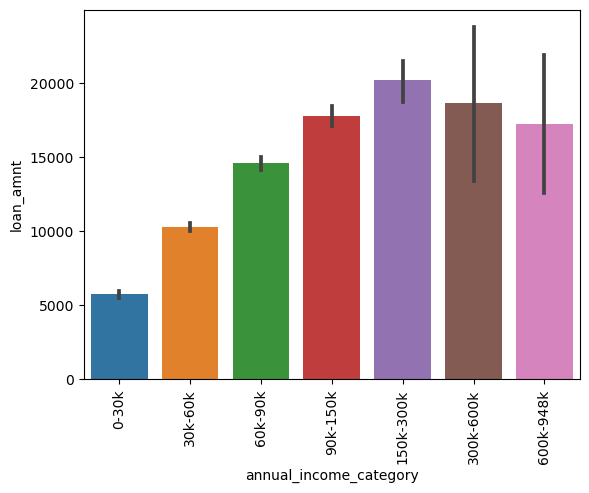

In [127]:
sns.barplot(data =charged_off,x=data1.annual_income_category, y=charged_off.loan_amnt )
plt.xticks(rotation=90)
ax[0].set_title("Loan amount Vs Annual Income Category", fontsize=14)

### Observation : While looking at the loan status with respect to Annual income range and their loan amount, range of 150k to 300k tend to default on their loan more

#### Default Indicators  : Loan amount higher than 15k and annual income range between 150k-300k

### Loan amount category vs Interest rates

<Axes: xlabel='int_rate', ylabel='loan_amount_category'>

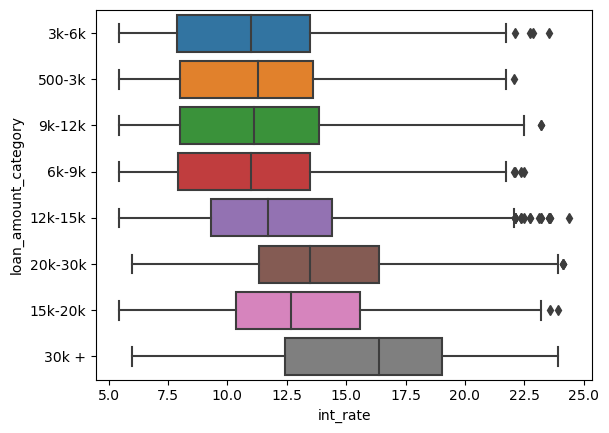

In [128]:
sns.boxplot(data =data1,x=data1.int_rate, y= data1.loan_amount_category)


<Axes: xlabel='loan_amount_category', ylabel='int_rate'>

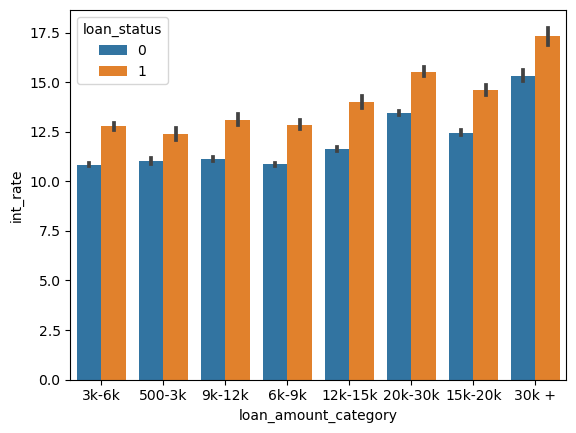

In [129]:
sns.barplot(data =data1,y=data1.int_rate,  x= data1.loan_amount_category , hue= data1.loan_status)


### Observation : higher is the loan amount, higher the interest rate and higher the chance of defaulting
#### Default Indicators  : Customers with loan amount more than 30k with rate of interest between 16-19%


### Default rate wrt inq_last_6mths
- multiple applications for new credit accounts within a short time frame could point to a risky borrower. 

Text(0.5, 1.0, 'Enquiry for Charged off only')

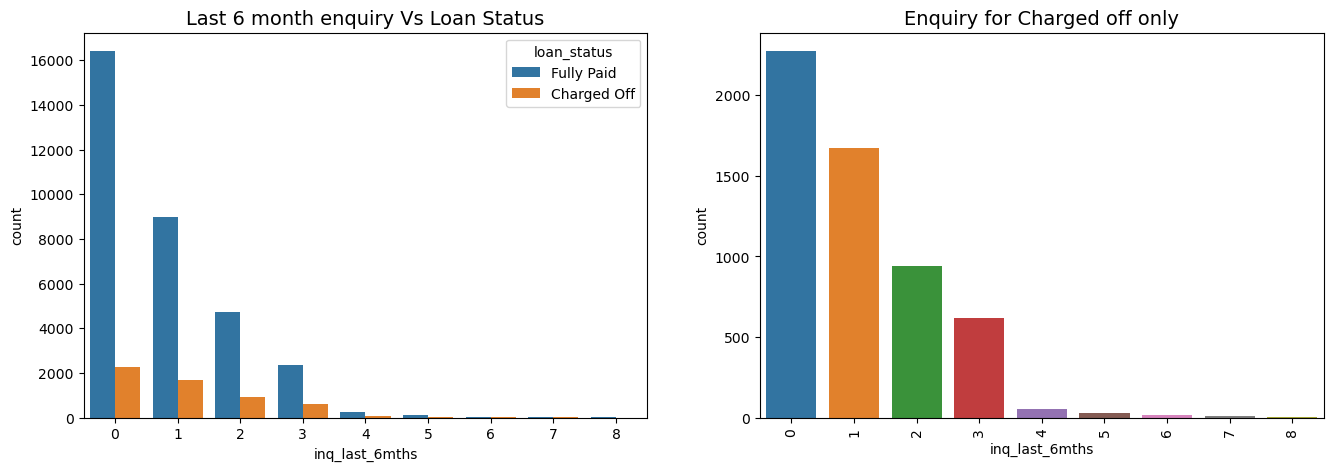

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
charged_off =data[data['loan_status']=='Charged Off']

sns.countplot(x=data.inq_last_6mths, hue=data.loan_status, ax = ax[0])
plt.xticks(rotation=90)
ax[0].set_title("Last 6 month enquiry Vs Loan Status", fontsize=14)

sns.countplot(x="inq_last_6mths", data=charged_off, ax = ax[1])
plt.xticks(rotation=90)
ax[1].set_title("Enquiry for Charged off only", fontsize=14)

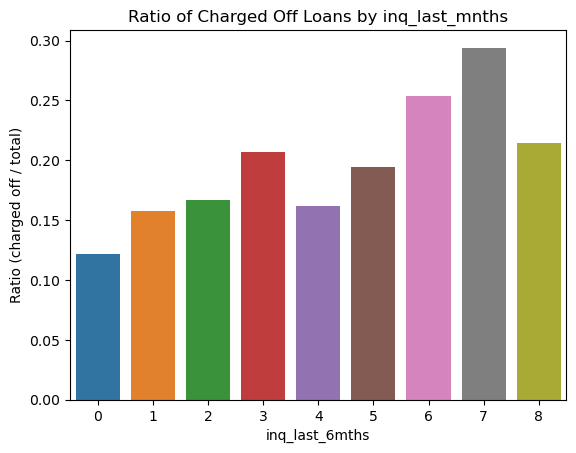

In [133]:
grouped = data.groupby(['inq_last_6mths', 'loan_status']).size().unstack()

# Calculate the ratio of 'charged off' to total count for each 'inq_last_mnths'
grouped['ratio'] = grouped['Charged Off'] / (grouped['Charged Off'] + grouped['Fully Paid'])
#
grouped
grouped = grouped.reset_index()
grouped
sns.barplot(x='inq_last_6mths', y='ratio', data=grouped)
plt.xlabel('inq_last_6mths')
plt.ylabel('Ratio (charged off / total)')
plt.title('Ratio of Charged Off Loans by inq_last_mnths')
plt.show()

#### Observation : When enquiries in last 6months were 6 and more then the chance of defaulting is around 25% or more. Hence inq_last_6_months is good indicator for deafulters

### Address state with Annual income category and Loan amount category

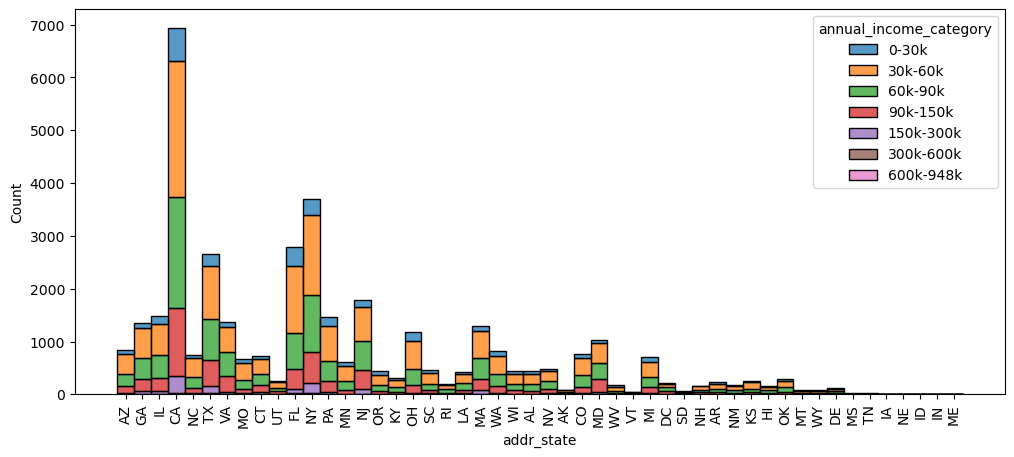

In [134]:
fig,ax = plt.subplots(figsize = (12,5))

charged_off =data[data['loan_status']=='Charged Off']

sns.histplot(x=data.addr_state, hue=data1.annual_income_category,data=charged_off,stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.show()

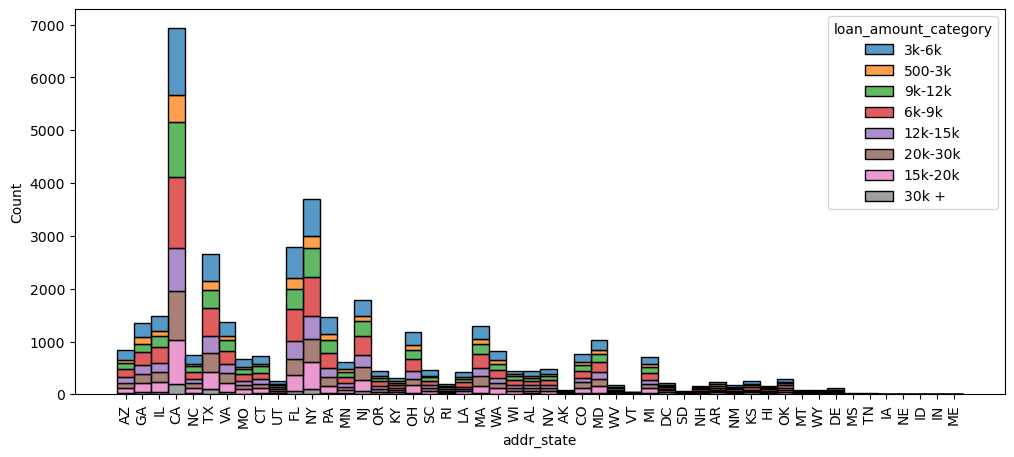

In [135]:
fig,ax = plt.subplots(figsize = (12,5))

sns.histplot(x=data.addr_state, hue=data1.loan_amount_category,data=data,stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.show()

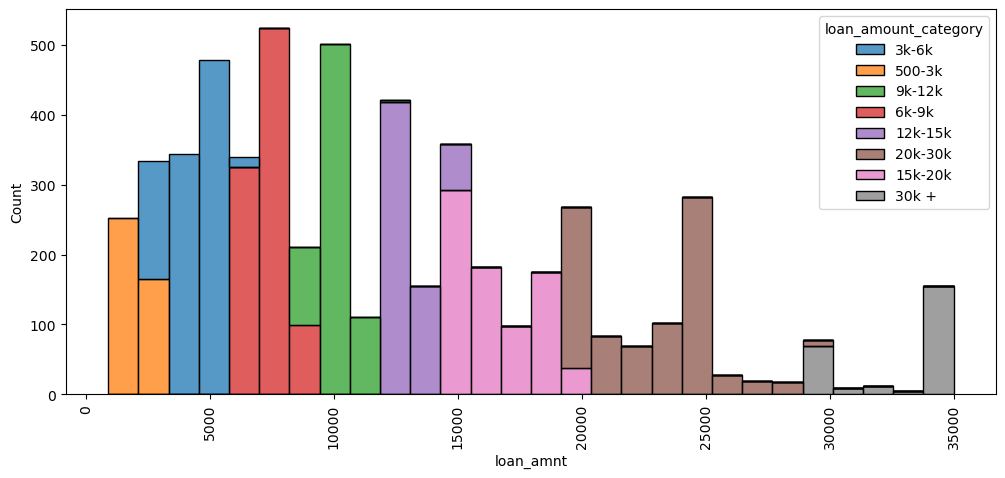

In [136]:
fig,ax = plt.subplots(figsize = (12,5))

sns.histplot(x=charged_off.loan_amnt, hue=data1.loan_amount_category,data=charged_off,stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.show()

#### Observation: We know that states of CA, FL, NA have more number of deafulters.
#### Bivariate analysis with annual_income_category show that 30k-60k is more in CA,FL and NA, which holds true wrt our previous analyis of defaulters in annual_income_category.

#### Bivariate analysis with loan_amount_category show that 6k-9k is more in CA,FL and NA, which holds true wrt our previous analyis of defaulters in loan_amount_category.

#### Default indicators: Applicants from States of CA, FL and NY with annual income between 30k-90k and loan amount between 6k-9k.

### Deafulters wrt Installments and Loan term

In [137]:
#installment category percentage calc

In [140]:
grouped = data1.groupby(['installment_category', 'loan_status']).size().unstack()

# Calculate the ratio of 'charged off' to total count for each 'inq_last_mnths'
grouped['loan_status_ratio'] = grouped[1] / (grouped[1] + grouped[0])

grouped = grouped.reset_index()

desired_order = ['12-100', "100-200", "200-400", "400-600", "600-800","800-1000","1000-1200","1200+"] 

grouped['installment_category'] = pd.Categorical(grouped['installment_category'], categories=desired_order, ordered=True)
grouped.sort_values('installment_category', inplace=True)



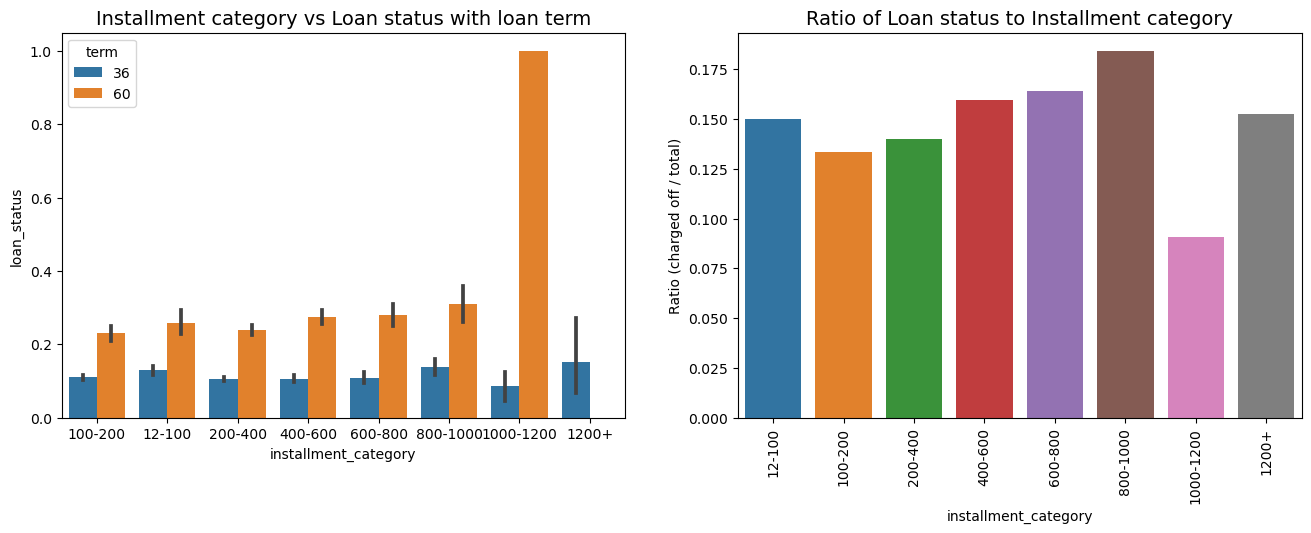

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.barplot(data=data1, x=data1.installment_category, y=data1.loan_status, hue=data1.term,ax= ax[0])
# sns.catplot(data=data1, x=data1.loan_status, y=data1.installment_category, col=data1.term,kind="bar", height=4, aspect=.6,ax= ax[0])
plt.xticks(rotation=90)
ax[0].set_title("Installment category vs Loan status with loan term", fontsize=14)

sns.barplot(x='installment_category', y='loan_status_ratio', data=grouped, ax= ax[1])
plt.xlabel('installment_category')
plt.ylabel('Ratio (charged off / total)')
ax[1].set_title("Ratio of Loan status to Installment category", fontsize=14)

plt.show()

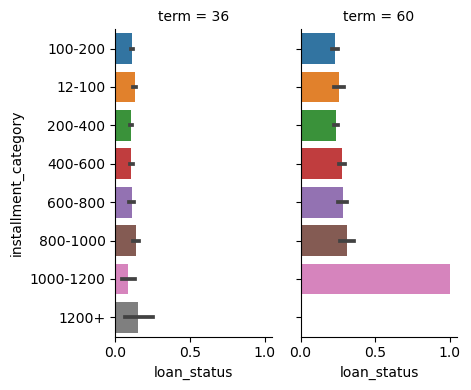

In [142]:
sns.catplot(data=data1, x="loan_status", y="installment_category", col="term",kind="bar", height=4, aspect=.6,ax= ax[0])
plt.show()

#### Observatoins: Overall % of people who are deafulting are in installment range 800-1000
#### Default indicators : Loan term=60months and installment range 1000-1200

#### DTI with installment range and home ownership type

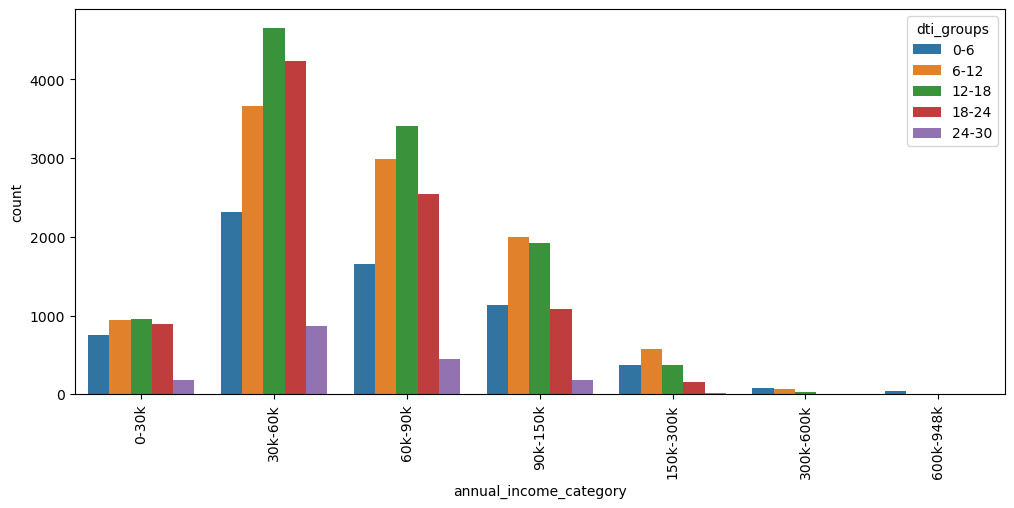

In [159]:
fig,ax = plt.subplots(figsize = (12,5))

sns.countplot(x=data1.annual_income_category, hue=data1.dti_groups,data=charged_off)
plt.xticks(rotation=90)
plt.show()

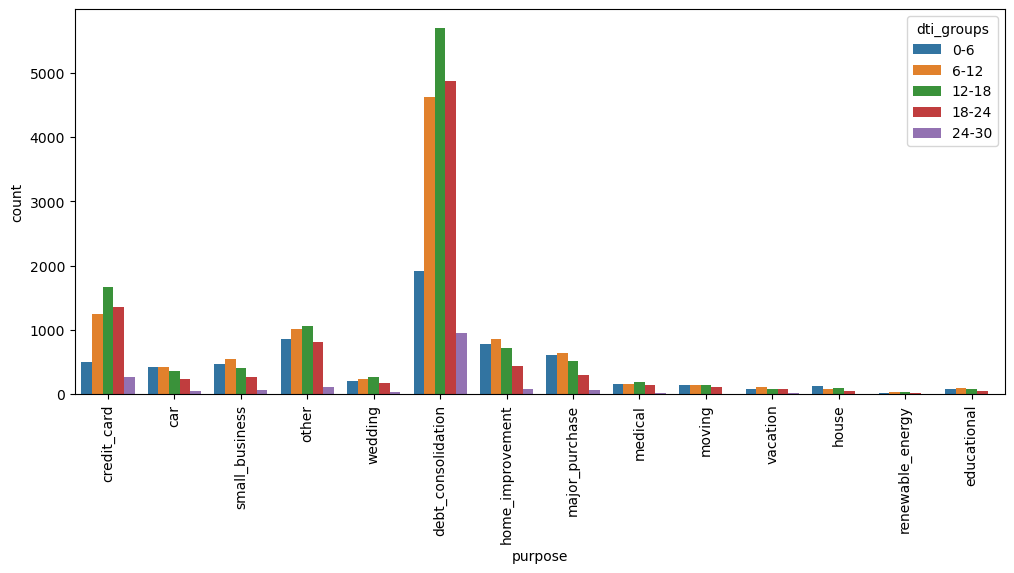

In [158]:
fig,ax = plt.subplots(figsize = (12,5))

sns.countplot(x=data1.purpose, hue=data1.dti_groups,data=charged_off)
plt.xticks(rotation=90)
plt.show()

#### Default indicators : Installment category of 200-400 , home ownership type as rent and mortgage with dti range of 12-18%

### CONCLUSION
On observing the trends from the data set obtained the following factors should be considered by the bank before approving loans :
1. If customer is having home ownership as renting or mortgage , and with the annual income in the range 30-60k , it can be a high risk profile
2. If customers purpose for loan is home improvement and annual income is around 80k, huge loans should not be approved
3. Longer term loans with installments of 1000-2000 is a high risk
4. Bank should reduce providing loans between 6K - 9K for the states for CA, NY and FL
5. Bank should discourage providing loans for lower grades
6. Banks issue a lot of loans to people with 0 public records and 2-10 open credit line , and which ideally indicate low risk, but according to the data have a high number of defaulters
7. Bank should discourage sanctioning Loan amount more than 30k with rate of interest between 16-19% as it shows high number of defaulters
8. Banks should discourage approval of loans if Inquiry for Loan in the last 6 months greater or equal to 6
9. If the DTI range of 12-24% we found that there is a high likelihood they are taking loan for debt
consolidation , which increases risk